In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import lmdiag

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn')

# PSS 3.3 HW3 -- Problem 1, Problem 2

# Problem 1: Use “Auto” data set.

### a) Perform a simple linear regression with “mpg” as the response and “horsepower” as the predictor

In [24]:
auto = pd.read_csv('Data/Auto.csv', na_values='?').dropna()
print(auto.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB
None


In [25]:
auto.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198.0,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220.0,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215.0,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225.0,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190.0,3850,8.5,70,1,amc ambassador dpl


In [26]:
print("MaxVal (mpg): %s" % max(auto.mpg))
print("MinVal (mpg): %s" % min(auto.mpg))

print("MaxVal (horsepower): %s" % max(auto.horsepower))
print("MinVal (horsepower): %s" % min(auto.horsepower))

MaxVal (mpg): 46.6
MinVal (mpg): 9.0
MaxVal (horsepower): 230.0
MinVal (horsepower): 46.0


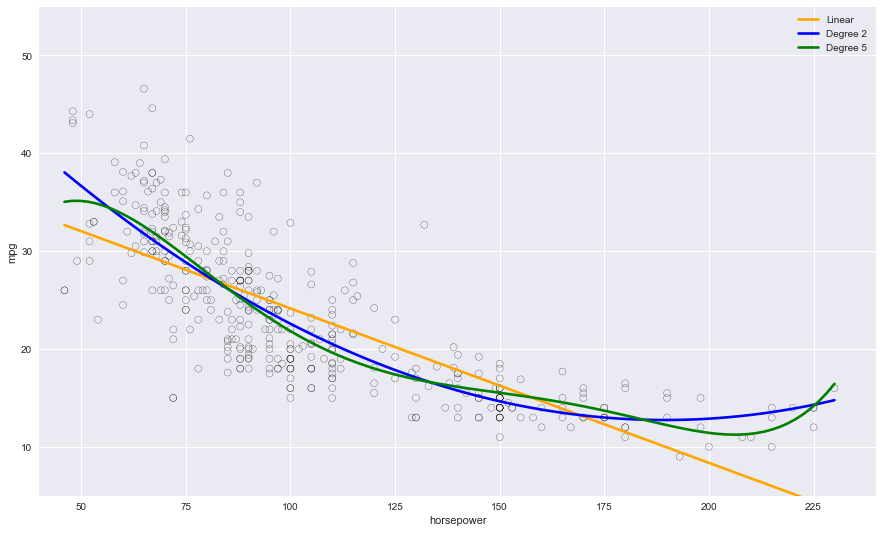

In [27]:
plt.figure(figsize=(15,9))
plt.scatter(auto.horsepower, auto.mpg, facecolors='None', edgecolors='k', alpha=.8)
sns.regplot(auto.horsepower, auto.mpg, ci=None, label='Linear', scatter=False, color='orange')
sns.regplot(auto.horsepower, auto.mpg, ci=None, label='Degree 2', order=2, scatter=False, color='blue')
sns.regplot(auto.horsepower, auto.mpg, ci=None, label='Degree 5', order=5, scatter=False, color='g')
plt.legend()

plt.ylim(5,55)
plt.xlim(40,240);

In [28]:
auto_simple_regression = smf.ols('mpg ~ horsepower', auto).fit()
print(auto_simple_regression.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Thu, 13 Feb 2020   Prob (F-statistic):           7.03e-81
Time:                        21:47:33   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.0

P-value for horsepower feature is 0 therefore we can say that there is some linear relationship between the predictor and the response.  
Moreover, confidence interval is [-0.171      -0.145], and 0 is not there which is also good thing. That's mean that the coefficient can not be 0 in mean.

In [30]:
print('Predicted value for 98th horseposer: ')
print(auto_simple_regression.predict(auto.horsepower.iloc[97:98,]))
print('\n')
print('Actual value of 98th mpg: ')
print(auto.iloc[97:98,0])

Predicted value for 98th horseposer: 
98    24.151388
dtype: float64


Actual value of 98th mpg: 
98    16.0
Name: mpg, dtype: float64


### b) Plot the response and the predictor. Display the least squares regression line

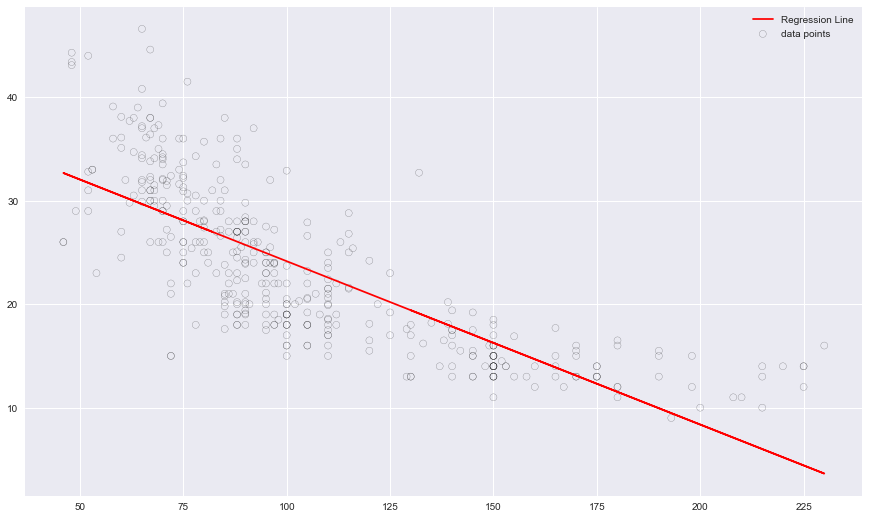

In [33]:
plt.figure(figsize=(15,9))
plt.scatter(auto.horsepower, auto.mpg, facecolors='None', edgecolors='k', alpha=.5, label="data points")
plt.plot(auto.horsepower, auto_simple_regression.fittedvalues, color='red', label="Regression Line")
plt.legend()
plt.show()

### c) Produce diagnostic plots. Comment on any problems you see with the fit
### d) Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage

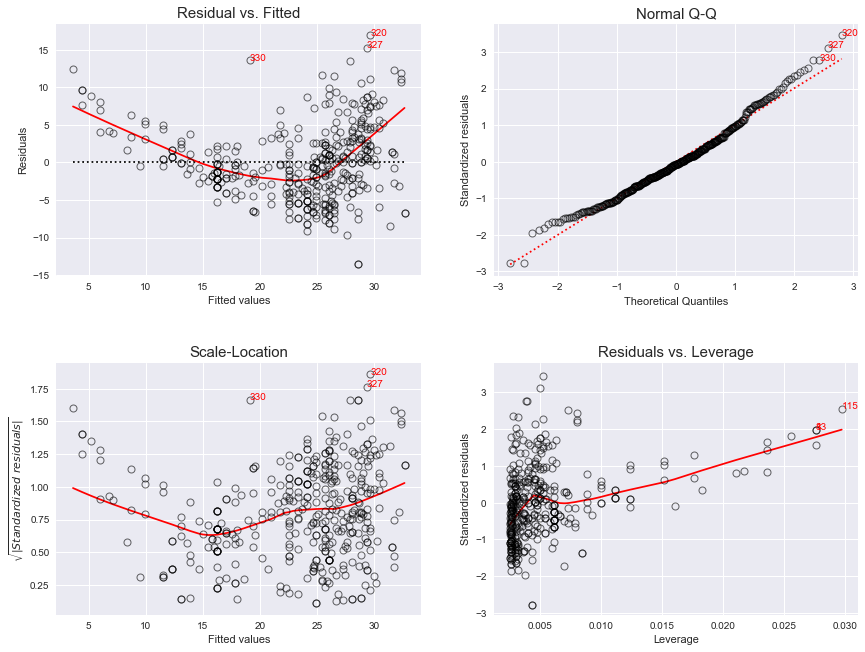

In [34]:
plt.figure(figsize=(12,9))
lmdiag.plot(auto_simple_regression)
plt.show()

The four plots show potential problematic cases with the row numbers of the data in the dataset. If some cases are identified across all four plots, we might want to take a close look at them individually. Is there anything special for the subject? Or could it be simply errors in data entry?

### 1. Residuals vs Fitted
This plot shows if residuals have non-linear patterns. There could be a non-linear relationship between predictor variables and an outcome variable and the pattern could show up in this plot if the model doesn’t capture the non-linear relationship. If we find equally spread residuals around a horizontal line without distinct patterns, that is a good indication we don’t have non-linear relationships.  
I see a parabola in our case, so the non-linear relationship was not explained by the model and was left out in the residuals.

### 2. Normal Q-Q
This plot shows if residuals are normally distributed. Do residuals follow a straight line well or do they deviate severely? It’s good if residuals are lined well on the straight dashed line.  
Notice the points form a curve instead of a straight line. Normal Q-Q plots that look like this usually mean our sample data are skewed.

### 3. Scale-Location
It’s also called Spread-Location plot. This plot shows if residuals are spread equally along the ranges of predictors. This is how we can check the assumption of equal variance (homoscedasticity). It’s good if we see a horizontal line with equally (randomly) spread points.  
In our case, the red smooth line is not horizontal and shows a steep angle.

### 4. Residuals vs Leverage
This plot helps us to find influential cases (i.e., subjects) if any. Not all outliers are influential in linear regression analysis. Even though data have extreme values, they might not be influential to determine a regression line. That means, the results wouldn’t be much different if we either include or exclude them from analysis. They follow the trend in the majority of cases and they don’t really matter; they are not influential. On the other hand, some cases could be very influential even if they look to be within a reasonable range of the values. They could be extreme cases against a regression line and can alter the results if we exclude them from analysis. Another way to put it is that they don’t get along with the trend in the majority of the cases.  
  
Unlike the other plots, this time patterns are not relevant. We watch out for outlying values at the upper right corner or at the lower right corner. Those spots are the places where cases can be influential against a regression line. Look for cases outside of a dashed line, Cook’s distance. When cases are outside of the Cook’s distance (meaning they have high Cook’s distance scores), the cases are influential to the regression results. The regression results will be altered if we exclude those cases.  
  
Our case is the typical look when there is no influential case.

### So, what does having patterns in residuals mean to our research? 
It’s not just a go-or-stop sign. It tells us about our model and data. Our current model might not be the best way to understand our data if there’s so much good stuff left in the data.

In that case, we may want to go back to our theory and hypotheses. Is it really a linear relationship between the predictors and the outcome? We may want to **include a quadratic term**, for example. A log transformation may better represent the phenomena that we’d like to model. Or, is there any important variable that we left out from our model? Other variables we didn’t include may play an important role in our model and data.  
#### Checking residuals is a way to discover new insights in our model and data!

# Problem 2. Use “Carseats” data set.

In [35]:
carseats = pd.read_csv('Data/Carseats.csv')
print(carseats.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   400 non-null    int64  
 1   Sales        400 non-null    float64
 2   CompPrice    400 non-null    int64  
 3   Income       400 non-null    int64  
 4   Advertising  400 non-null    int64  
 5   Population   400 non-null    int64  
 6   Price        400 non-null    int64  
 7   ShelveLoc    400 non-null    object 
 8   Age          400 non-null    int64  
 9   Education    400 non-null    int64  
 10  Urban        400 non-null    object 
 11  US           400 non-null    object 
dtypes: float64(1), int64(8), object(3)
memory usage: 37.6+ KB
None


In [36]:
carseats.head(10)

,Unnamed: 0,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,5,4.15,141,64,3,340,128,Bad,38,13,Yes,No
5,6,10.81,124,113,13,501,72,Bad,78,16,No,Yes
6,7,6.63,115,105,0,45,108,Medium,71,15,Yes,No
7,8,11.85,136,81,15,425,120,Good,67,10,Yes,Yes
8,9,6.54,132,110,0,108,124,Medium,76,10,No,No
9,10,4.69,132,113,0,131,124,Medium,76,17,No,Yes


In [37]:
carseats.select_dtypes(include='object').columns.values

array(['ShelveLoc', 'Urban', 'US'], dtype=object)

In [39]:
print(carseats.ShelveLoc.unique())
print(carseats.Urban.unique())
print(carseats.US.unique())

['Bad' 'Good' 'Medium']
['Yes' 'No']
['Yes' 'No']


In [40]:
carseats.Urban = carseats.Urban.map({'Yes':1, 'No':0})
carseats.US = carseats.US.map({'Yes':1, 'No':0})

In [41]:
carseats.head(10)

,Unnamed: 0,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,9.50,138,73,11,276,120,Bad,42,17,1,1
1,2,11.22,111,48,16,260,83,Good,65,10,1,1
2,3,10.06,113,35,10,269,80,Medium,59,12,1,1
3,4,7.40,117,100,4,466,97,Medium,55,14,1,1
4,5,4.15,141,64,3,340,128,Bad,38,13,1,0
5,6,10.81,124,113,13,501,72,Bad,78,16,0,1
6,7,6.63,115,105,0,45,108,Medium,71,15,1,0
7,8,11.85,136,81,15,425,120,Good,67,10,1,1
8,9,6.54,132,110,0,108,124,Medium,76,10,0,0
9,10,4.69,132,113,0,131,124,Medium,76,17,0,1


### a) Fit a multiple regression model to predict “Sales” using “Price”, “Urban”, and “US” (score=2).

In [42]:
carseats_multiple_regression = smf.ols(formula="Sales ~ Price + Urban + US", data=carseats).fit()

### b) For which of the predictors can you reject the null hypothesis H0: βj = 0

In [43]:
print(carseats_multiple_regression.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Thu, 13 Feb 2020   Prob (F-statistic):           2.39e-23
Time:                        21:49:30   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0435      0.651     20.036      0.0

From the summary above we can reject the null hypothesis only for "Urban" feature, because the corresponding p-value = 0.936.

In [44]:
carseats_simple_regression = smf.ols('Sales ~ Price', carseats).fit()

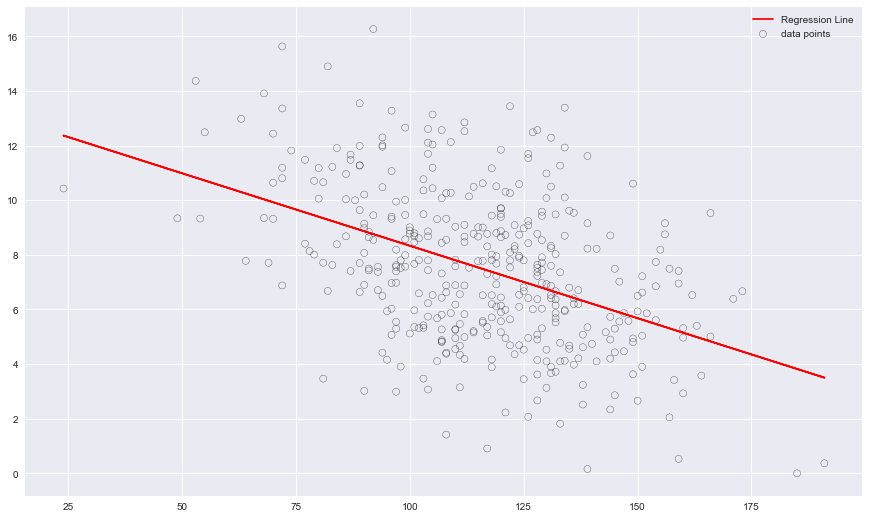

In [45]:
plt.figure(figsize=(15,9))
plt.scatter(carseats.Price, carseats.Sales, facecolors='None', edgecolors='k', alpha=.9, label="data points")
plt.plot(carseats.Price, carseats_simple_regression.fittedvalues, color='red', label="Regression Line")
plt.legend()
plt.show()

In [46]:
print(carseats_simple_regression.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     98.25
Date:                Thu, 13 Feb 2020   Prob (F-statistic):           7.62e-21
Time:                        21:50:10   Log-Likelihood:                -938.23
No. Observations:                 400   AIC:                             1880.
Df Residuals:                     398   BIC:                             1888.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.6419      0.633     21.558      0.0

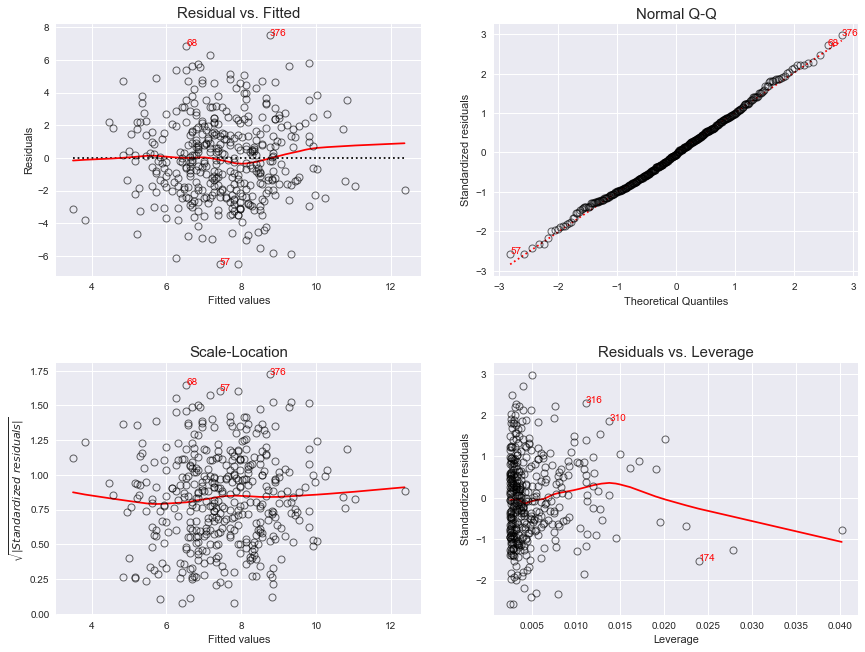

In [47]:
plt.figure(figsize=(12,9))
lmdiag.plot(carseats_simple_regression)
plt.show()

### c) On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome

In [48]:
carseats_smaller_multiple_regression = smf.ols(formula="Sales ~ Price + US", data=carseats).fit()

In [49]:
print(carseats_smaller_multiple_regression.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Thu, 13 Feb 2020   Prob (F-statistic):           2.66e-24
Time:                        21:50:26   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0308      0.631     20.652      0.0

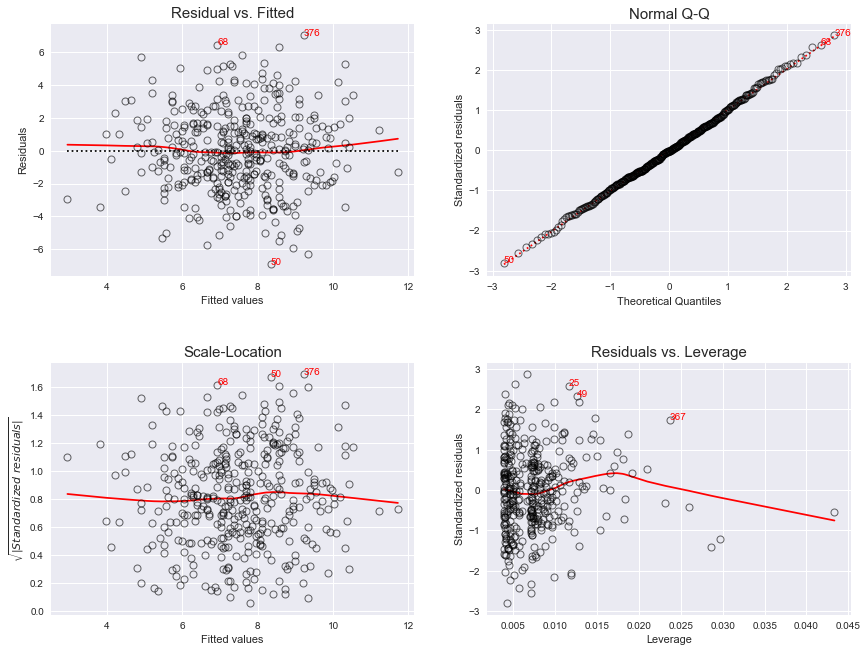

In [50]:
plt.figure(figsize=(12,9))
lmdiag.plot(carseats_smaller_multiple_regression)
plt.show()

### d) How well do the models in a) and c) fit the data.

Adj. R-squared for both cases almost the same:  
In first model (with Urban feature) it is = 0.234  
And in second model (without Urban feature) it is = 0.235  
  
And the first question that we are interesting is why we chose Adj. R-squared instead of R-squared and what they are,  
So let's answer that questions.  
At first **What Is R-squared**?  
R-squared is a statistical measure of how close the data are to the fitted regression line. It is also known as the coefficient of determination, or the coefficient of multiple determination for multiple regression.  
The definition of R-squared is fairly straight-forward; it is the percentage of the response variable variation that is explained by a linear model. Or:  
R-squared = Explained variation / Total variation  
  
R-squared is always between 0 and 100%:

    0% indicates that the model explains none of the variability of the response data around its mean.
    100% indicates that the model explains all the variability of the response data around its mean.
  
**Some Problems with R-squared**  
Problem 1: Every time we add a predictor to a model, the R-squared increases, even if due to chance alone. It never decreases. Consequently, a model with more terms may appear to have a better fit simply because it has more terms.  
Problem 2: If a model has too many predictors and higher order polynomials, it begins to model the random noise in the data. This condition is known as overfitting the model and it produces misleadingly high R-squared values and a lessened ability to make predictions.  
  
**What Is the Adjusted R-squared?**  
The adjusted R-squared compares the explanatory power of regression models that contain different numbers of predictors.  
Suppose we compare a five-predictor model with a higher R-squared to a one-predictor model. Does the five predictor model have a higher R-squared because it’s better? Or is the R-squared higher because it has more predictors? Simply compare the adjusted R-squared values to find out!  
The adjusted R-squared is a modified version of R-squared that has been adjusted for the number of predictors in the model. The adjusted R-squared increases only if the new term improves the model more than would be expected by chance. It decreases when a predictor improves the model by less than expected by chance. The adjusted R-squared can be negative, but it’s usually not.  It is always lower than the R-squared.  

### e) Using the model from c), obtain 95% confidence intervals for the coefficient(s)

In [53]:
carseats_smaller_multiple_regression.conf_int(alpha = .05)

,0,1
Intercept,11.79032,14.271265
Price,-0.06476,-0.044195
US,0.69152,1.707766


### f) Produce diagnostic plots of the linear regression fit. Comment on any problems you see with the fit

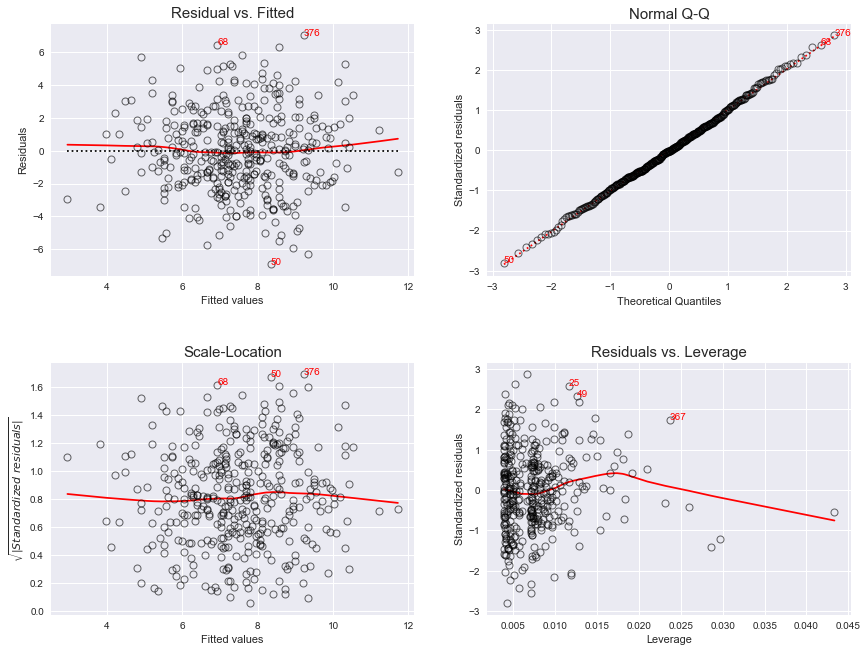

In [56]:
plt.figure(figsize=(12,9))
lmdiag.plot(carseats_smaller_multiple_regression)
plt.show();

I do not see any problem related with diagnostic plots.

### g) Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage

We do not have high leverage influential points, but we have outliers that should be excluded from the data set.

In [57]:
outliers = carseats.index.isin([68, 50, 376])

In [63]:
outliers[45:70]

array([False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False])

In [58]:
print('Total Number of outliers: %s ' % sum(outliers == True))

Total Number of outliers: 3 


In [59]:
carseats = carseats[~outliers] # remove outliers from dataframe

In [60]:
carseats.iloc[65:70]

,Unnamed: 0,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
66,67,8.85,127,92,0,508,91,Medium,56,18,1,0
67,68,9.01,126,61,14,152,115,Medium,47,16,1,1
69,70,7.99,127,59,0,339,99,Medium,65,12,1,0
70,71,9.46,89,81,15,237,99,Good,74,12,1,1
71,72,6.50,148,51,16,148,150,Medium,58,17,0,1


### To be continued!